In [1]:
#Objective
#We want to predict the house price based on the features.

In [2]:
# Import libraries:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machine learning:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# To plot diagram within the cell:
%matplotlib inline

In [3]:
# Load the kc housing dataset
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Omit ID and Date Columns:
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

In [8]:
#This is a nice dataset since it does not have any missing values. However, let's try to explore somethign from the dataset before we build the model.

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# NOrmalizing Data for comperision:
#In Machine Learning, we often need to deal with normalization. Normalization is the process of scaling the data to the range of 0 to 1.
#In this exercise, we will use MinMaxScaler().

In [14]:
from sklearn import preprocessing
#Scale and plot the features against price(target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = df.drop('price', axis=1).columns[:]
X = df.loc[:, col_name]
y = df['price']
# Normalizing X
X = pd.DataFrame(data = min_max_scaler.fit_transform(X), columns = col_name)

# Examine the normalized data
print(df.head())
X.head

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

<bound method NDFrame.head of        bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0      0.090909    0.12500     0.067170  0.003108     0.0         0.0   0.0   
1      0.090909    0.28125     0.172075  0.004072     0.4         0.0   0.0   
2      0.060606    0.12500     0.036226  0.005743     0.0         0.0   0.0   
3      0.121212    0.37500     0.126038  0.002714     0.0         0.0   0.0   
4      0.090909    0.25000     0.104906  0.004579     0.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
21608  0.090909    0.31250     0.093585  0.000370     0.8         0.0   0.0   
21609  0.121212    0.31250     0.152453  0.003206     0.4         0.0   0.0   
21610  0.060606    0.09375     0.055094  0.000503     0.4         0.0   0.0   
21611  0.090909    0.31250     0.098868  0.001132     0.4         0.0   0.0   
21612  0.060606    0.09375     0.055094  0.000337     0.4         0.0   0.0   

       condition     

In [15]:
#Now, we would like to examine the relationship of each feature against the target (price). We can do this through sns.regplot().
#regplot() will also try to draw a best fit line to show the linear relationship between each feature and the target.

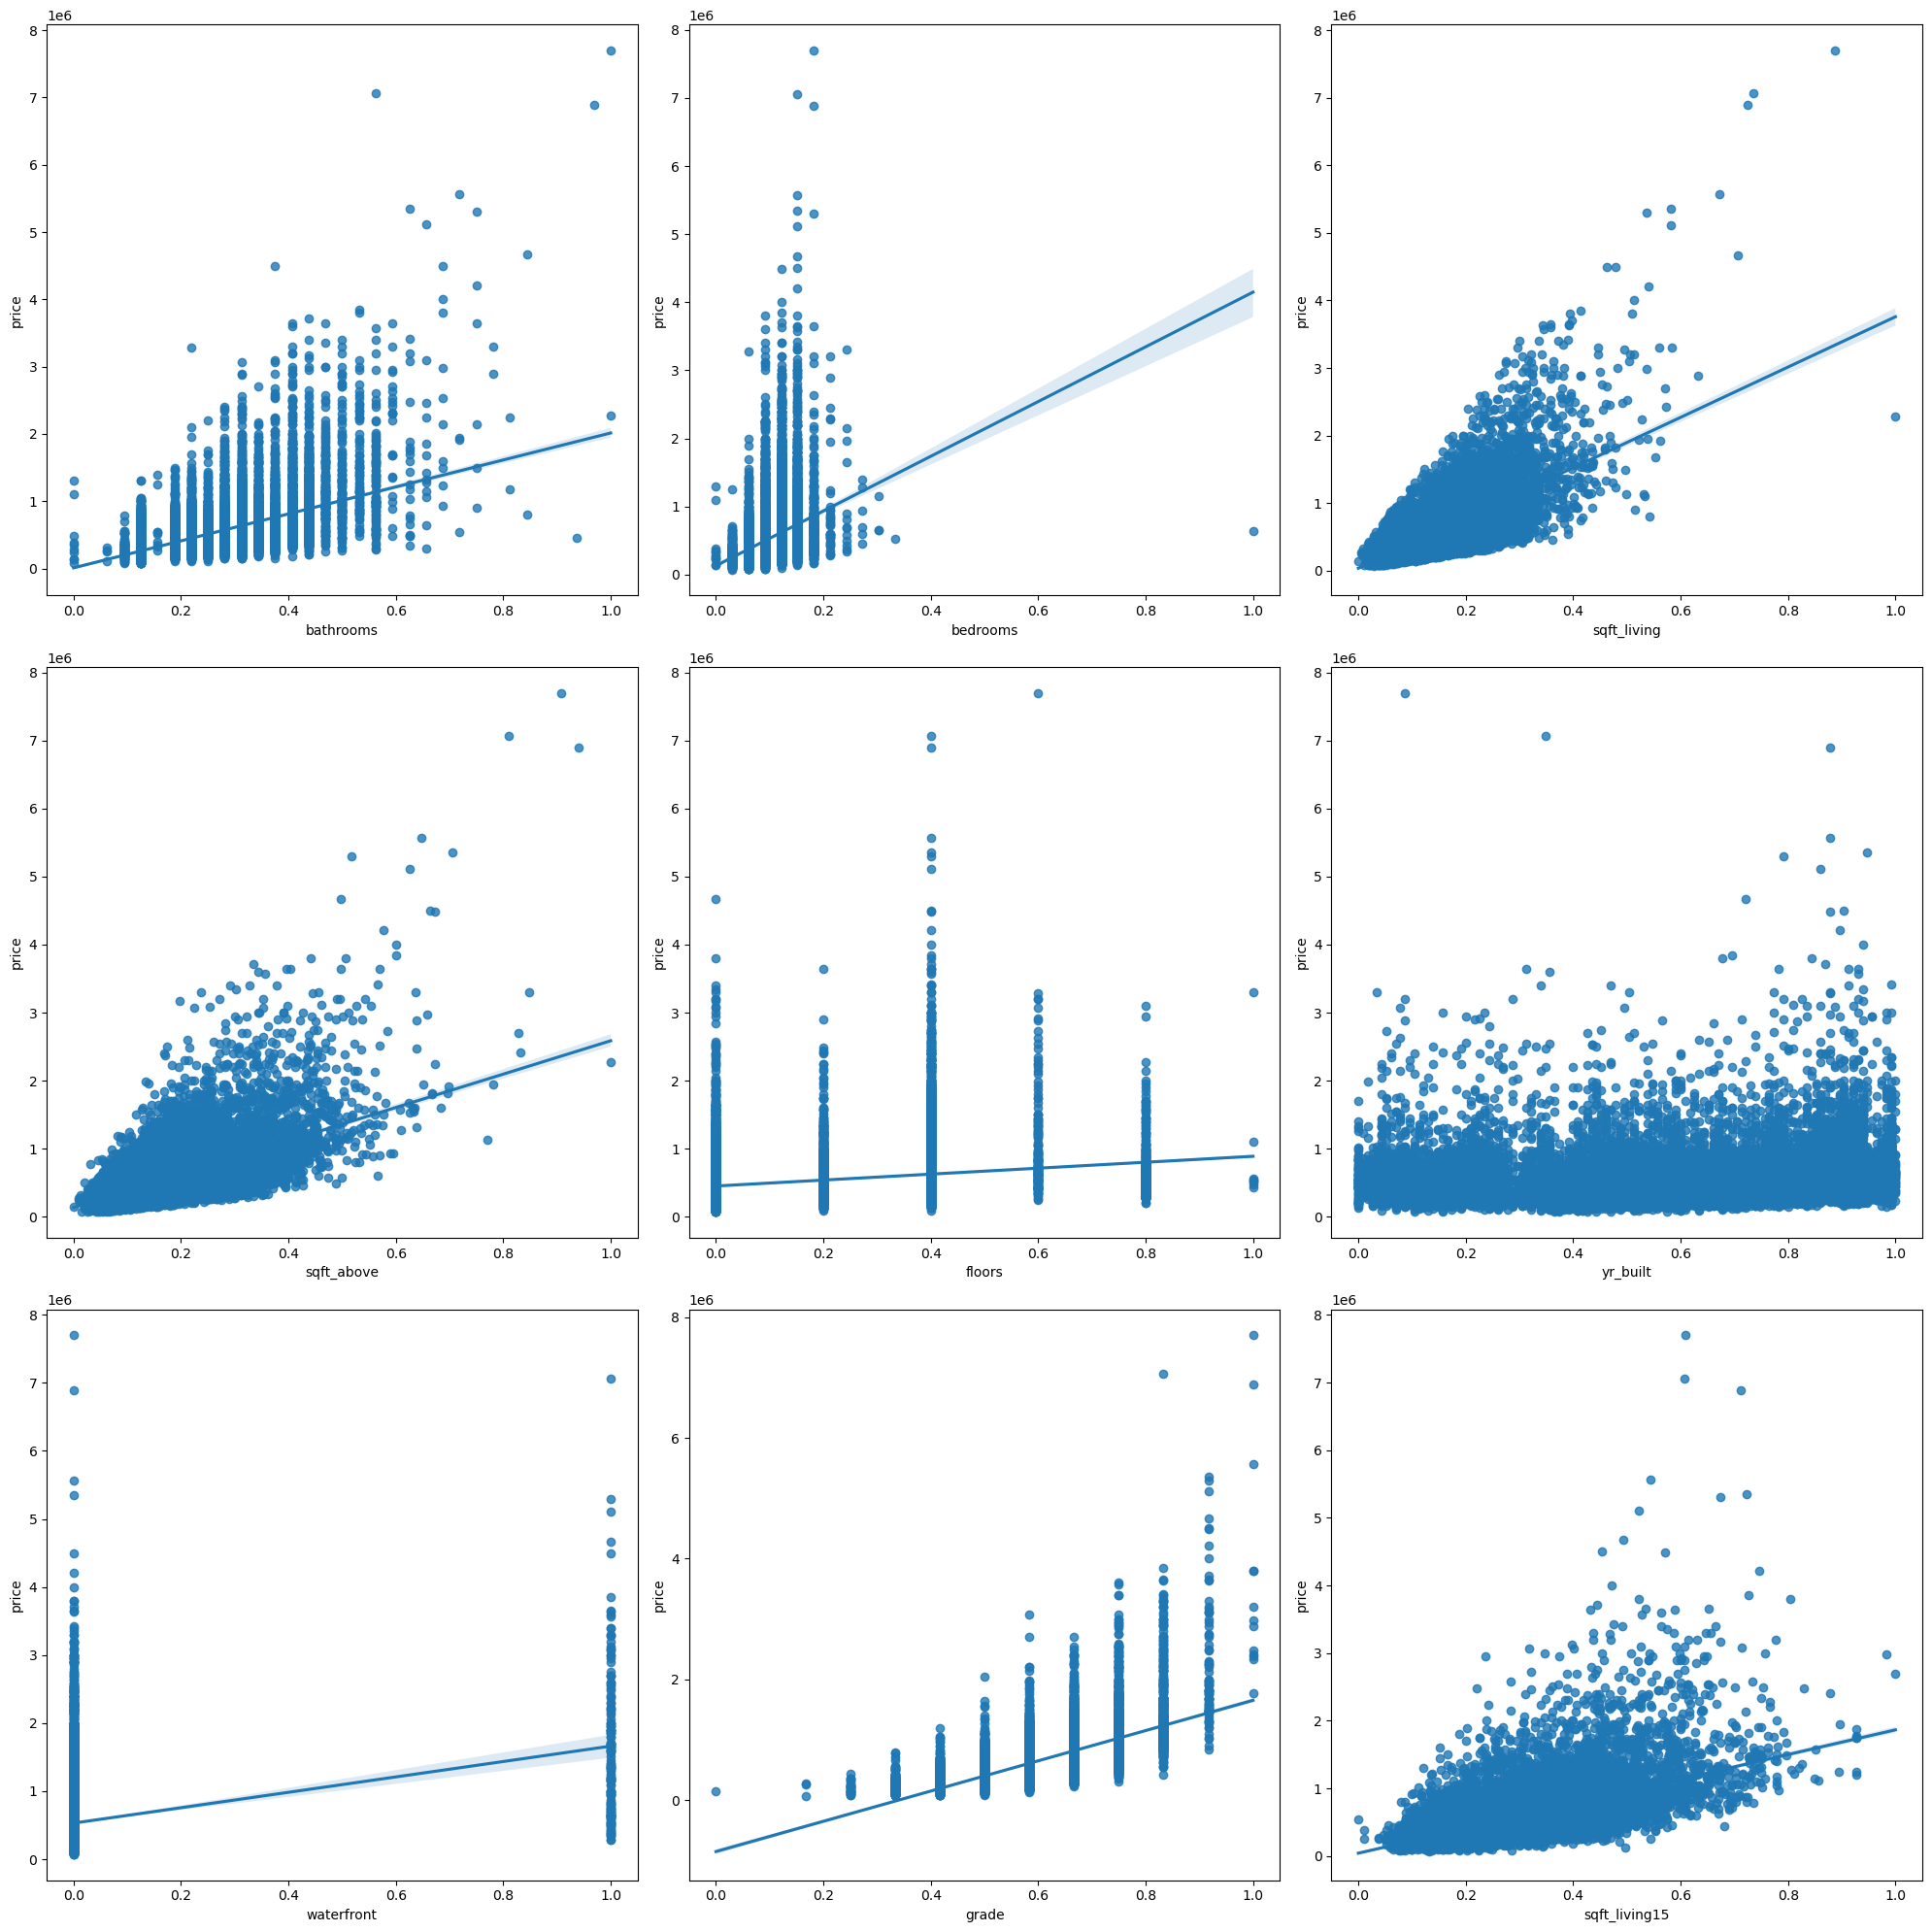

In [20]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = df['price'], x = X['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = X['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = X['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = X['sqft_above'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = X['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = X['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = X['waterfront'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = X['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = X['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()
plt.show()

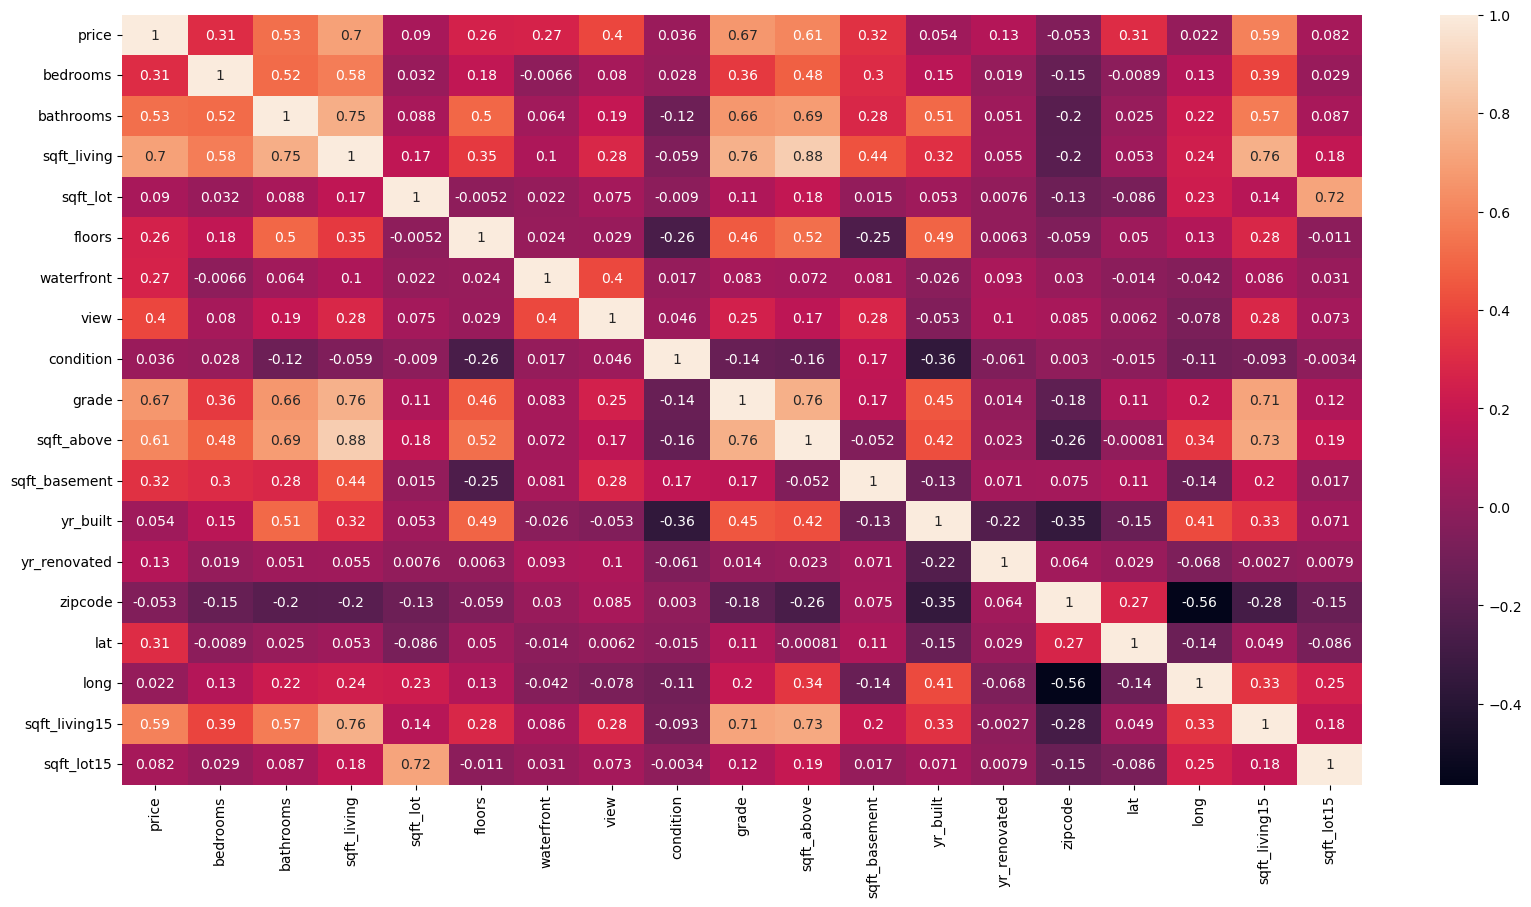

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [22]:
# Split The data and Train the Model:
features = df.drop('price', axis=1)
target = df['price']
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=5)
print('Train features shape :', train_features.shape)
print('Train target shape :', train_target.shape)
print('Test_features shape :', test_features.shape)
print('Test target shape :', test_target.shape)

Train features shape : (17290, 18)
Train target shape : (17290,)
Test_features shape : (4323, 18)
Test target shape : (4323,)


In [24]:
# Model Building:
model = LinearRegression()
model.fit(train_features, train_target)

LinearRegression()

In [26]:
# Interpret the Model:
print('Model interpret : ', model.intercept_, '\n')
print('Model coefficient : ', model.coef_, '\n')

for i in range(len(features.columns)):
    print(features.columns[i], ': ', model.coef_[i])

Model interpret :  4885194.0158888195 

Model coefficient :  [-3.41051487e+04  3.99211786e+04 -2.58757456e+03  1.26478128e-01
  5.33987195e+03  5.80487816e+05  5.35040293e+04  2.73331959e+04
  9.63305323e+04  2.76922289e+03  2.73674117e+03 -2.63338492e+03
  2.52026883e+01 -5.54455479e+02  6.02529710e+05 -2.07308756e+05
  2.01439122e+01 -3.84507098e-01] 

bedrooms :  -34105.14872615698
bathrooms :  39921.17861703901
sqft_living :  -2587.574560416906
sqft_lot :  0.12647812776683948
floors :  5339.8719484017265
waterfront :  580487.8156734424
view :  53504.029319224486
condition :  27333.195886130077
grade :  96330.53232095661
sqft_above :  2769.2228929855373
sqft_basement :  2736.741171579893
yr_built :  -2633.384922237331
yr_renovated :  25.202688266627504
zipcode :  -554.4554793060177
lat :  602529.7099847104
long :  -207308.75551896438
sqft_living15 :  20.143912231170344
sqft_lot15 :  -0.38450709788648846


In [27]:
#Now We are able to see the coefficients and the intercept. What does it means? It means the model can be mathematically express as: $$Price = 4885194.02 - 34105.15 * bedrooms + 39921.18 * bathrooms - 2587.57 * sqft_{living} + ... $$

#Compare it to the general equation: $$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

In [ ]:
# Model evaluation for training set
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)


In [28]:
# Model Evaluation for training set:
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)

In [ ]:
# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")



In [30]:
# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

           price     Predicted     Difference
3856    535000.0  6.568467e+05  121846.663826
5010    425000.0  2.880304e+05 -136969.567857
18050   800000.0  1.041330e+06  241330.384616
570     338900.0  1.797743e+05 -159125.738118
8556   1110000.0  1.122411e+06   12411.219660
19435   333000.0  4.801479e+05  147147.907190
16918   830000.0  8.114510e+05  -18548.967652
21010   525000.0  5.585742e+05   33574.160662
6156    375000.0  3.682123e+05   -6787.733889
10074   333760.0  3.485609e+05   14800.947067 



In [31]:
print('Model trainig performance:')
print('--------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

Model trainig performance:
--------------------------
RMSE is 201016.80578429985
R2 score is 0.699631721212128




In [33]:
# Model evaluation for testing set:
test_target_pred = model.predict(test_features)
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)

In [35]:
output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, '\n')

print('Model testing performance:')
print('--------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

          price     Predicted     Difference
17485  365000.0  4.280495e+05   63049.478229
15164  225000.0  9.861129e+04 -126388.707462
18449  384950.0  4.832986e+05   98348.646509
6828   657500.0  5.908904e+05  -66609.583049
18281  959000.0  1.195190e+06  236189.880049
14625  855000.0  8.805543e+05   25554.290966
14864  575000.0  6.394081e+05   64408.126046
17257  856500.0  9.838877e+05  127387.673368
11817  250000.0  3.381665e+05   88166.488266
15262  360000.0  5.975140e+05  237514.025640 

Model testing performance:
--------------------------
RMSE is 202682.13209531637
R2 score is 0.6993311796454431


In [36]:
#Now we see that the $R^2$ score of our model is just 0.699, and the difference between the actual and the predicted value is high.

#Why is this happenning?

#The data is too disperse.
#Some of the variables might not have a linear relationship with price.
#Some data can be cleaned further (Example: year built, zipcode)